In [1]:
## let load the dataset
import pandas as pd

df = pd.read_csv(r"C:\Users\HELLO\Downloads\Churn_Modelling.csv")
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## To Inspect Dataset

In [2]:
df.shape

(10000, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## To Check Target Distribution

In [5]:
## Most churn datasets use column Exited for churn
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [6]:
## This shows churn imbalance Which is important business insight
df['Exited'].value_counts(normalize=True)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

## To Drop Irrelevant Columns

In [7]:
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)

## Encode Categorical Features

In [8]:
## This converts geography/gender to numeric
df = pd.get_dummies(df, drop_first=True)

## Train/Test Split

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

## Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train First Model (Logistic Regression)

In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


## Predictions & Evaluation

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

preds = model.predict(X_test)

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[1543   64]
 [ 314   79]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



## Second Train Model (Decision Tree)

In [13]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)

dt_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## Predictions

In [14]:
dt_preds = dt_model.predict(X_test)

## Evaluate Decision Tree

In [15]:
## from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, dt_preds))
print(classification_report(y_test, dt_preds))

[[1559   48]
 [ 237  156]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.76      0.40      0.52       393

    accuracy                           0.86      2000
   macro avg       0.82      0.68      0.72      2000
weighted avg       0.85      0.86      0.84      2000



## Compare Accuracy of Both Models

In [16]:
from sklearn.metrics import accuracy_score

log_acc = accuracy_score(y_test, preds)
dt_acc = accuracy_score(y_test, dt_preds)

print("Logistic Regression Accuracy:", log_acc)
print("Decision Tree Accuracy:", dt_acc)

Logistic Regression Accuracy: 0.811
Decision Tree Accuracy: 0.8575


## Plot ROC Curve

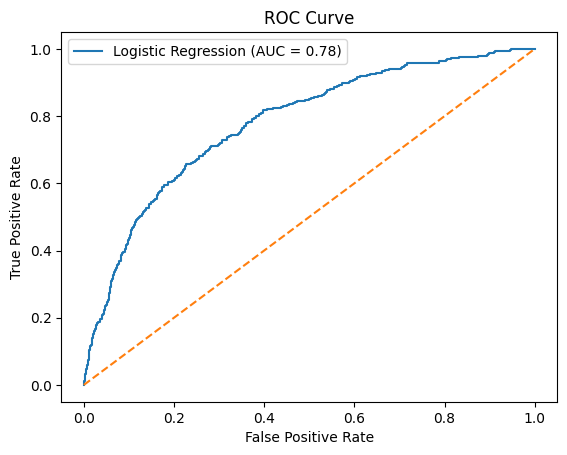

In [17]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# logistic regression probabilities
log_probs = model.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, log_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()